In [9]:
import matplotlib
import operator
%matplotlib inline
import pandas as pd
import numpy as np
import numpy.matlib as npm
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
import shap

matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.size'] = 10

# import custom functions
from functions_statistical_performance import *
# load JS visualization code
shap.initjs()

In [10]:
pathdir1='./input_data/'
pathdir2='./paper_classifiers_outcomes/'

# Load Training Data

In [11]:
RFFNDDS=pd.read_csv(pathdir1+'FNDDS_2009-10_Training_Data.csv')
RFFNDDS

,Protein,Total Fat,Carbohydrate,Alcohol,Water,Caffeine,Theobromine,"Sugars, total","Fiber, total dietary",Calcium,...,Total flavones,Total flavonols,Total isoflavones,Food_code,Main_food_description,catnumb,catname,novaclass,macroclass,pythonlabel
0,-20.000000,-20.000000,-20.000000,-20.0,-1.609438,-20.0,-20.0,-20.000000,-20.0,-3.729701,...,-20.0,-20.0,-20.0,2047,"Salt, table",0,addition1516,2,Other,1
1,0.029559,1.477049,1.930071,-20.0,4.471639,-20.0,-20.0,1.930071,-20.0,-3.442019,...,-20.0,-20.0,-20.0,11000000,"Milk, human",9602,Human milk,1,Milk,0
2,1.187843,0.647103,1.578979,-20.0,4.491441,-20.0,-20.0,1.625311,-20.0,-2.128632,...,-20.0,-20.0,-20.0,11100000,"Milk, NFS",1004,"Milk, reduced fat",1,Milk,0
3,1.147402,1.178655,1.568616,-20.0,4.478813,-20.0,-20.0,1.619388,-20.0,-2.180367,...,-20.0,-20.0,-20.0,11111000,"Milk, cow's, fluid, whole",1002,"Milk, whole",1,Milk,0
4,1.131402,1.241269,1.495149,-20.0,4.479607,-20.0,-20.0,1.495149,-20.0,-2.292635,...,-20.0,-20.0,-20.0,11111100,"Milk, cow's, fluid, whole, low-sodium",1002,"Milk, whole",1,Milk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,-20.000000,-20.000000,-1.897120,-20.0,4.603669,-20.0,-20.0,-20.000000,-20.0,-6.907755,...,-20.0,-20.0,-20.0,94100200,"Water, bottled, sweetened, with low or no calo...",7802,Flavored or carbonated water,4,Other,3
7250,-20.000000,-20.000000,1.504077,-20.0,4.547965,-20.0,-20.0,1.504077,-20.0,-4.074542,...,-20.0,-20.0,-20.0,94100300,"Water, fruit flavored, sweetened, with high fr...",7802,Flavored or carbonated water,4,Other,3
7251,-20.000000,-20.000000,0.198851,-20.0,4.592895,-20.0,-20.0,0.198851,-20.0,-6.907755,...,-20.0,-20.0,-20.0,94210100,Propel Water,7804,Enhanced or fortified water,4,Other,3
7252,-20.000000,-20.000000,1.702928,-20.0,4.547965,-20.0,-20.0,1.702928,-20.0,-4.074542,...,-20.0,-20.0,-20.0,94210200,Glaceau Water,7804,Enhanced or fortified water,4,Other,3


# Feature Space

In [12]:
# nutrient list
nl=list(RFFNDDS.columns)
nl=nl[0:-7]
selnut=['Protein','Alcohol', 'Water', 'Caffeine',
       'Theobromine', 'Sugars, total', 'Fiber, total dietary', 'Calcium',
       'Iron', 'Magnesium', 'Phosphorus', 'Potassium', 'Sodium', 'Zinc',
       'Copper', 'Selenium', 'Retinol', 'Carotene, beta', 'Carotene, alpha',
       'Vitamin E (alpha-tocopherol)', 'Vitamin D (D2 + D3)',
       'Cryptoxanthin, beta', 'Lycopene', 'Lutein + zeaxanthin', 'Vitamin C',
       'Thiamin', 'Riboflavin', 'Niacin', 'Vitamin B-6',
       'Vitamin B-12', 'Choline, total', 'Vitamin K (phylloquinone)',
       'Folic acid', 'Folate, food', 'Vitamin E, added', 'Vitamin B-12, added',
       'Cholesterol', '4:00', '6:00', '8:00',
       '10:00', '12:00', '14:00', '16:00', '18:00', '18:01', '18:02', '18:03',
       '20:04', '22:6 n-3', '16:01', '18:04', '20:01', '20:5 n-3', '22:01',
       '22:5 n-3','Daidzein', 'Genistein',
       'Glycitein', 'Cyanidin', 'Petunidin', 'Delphinidin', 'Malvidin',
       'Pelargonidin', 'Peonidin', '(+)-Catechin', '(-)-Epigallocatechin',
       '(-)-Epicatechin', '(-)-Epicatechin 3-gallate',
       '(-)-Epigallocatechin 3-gallate', 'Theaflavin', 'Thearubigins',
       'Eriodictyol', 'Hesperetin', 'Naringenin', 'Apigenin', 'Luteolin',
       'Isorhamnetin', 'Kaempferol', 'Myricetin', 'Quercetin',
       "Theaflavin-3,3'-digallate", "Theaflavin-3'-gallate",
       'Theaflavin-3-gallate', '(+)-Gallocatechin']

In [13]:
#data to train  and cross validate from scratch 
data2train=RFFNDDS[RFFNDDS.pythonlabel!=-1]
X=data2train.loc[:, selnut]
y=data2train['pythonlabel']

In [15]:
#load classifier 
(performancesAUCS, performancesAUPS, splitsS, model_per_foldS)=joblib.load(pathdir2+'model85nutrients_shap.pkl');

# Generating Shap Explanation for the Cross Validation

In [16]:
list_class=list()
list_real_class=list()
list_prob=list()
list_shap_values = list()
list_test_sets = list()
list_explainers=list()

count=0
for train, test in splitsS:
    X_test=X.iloc[test]
    y_test=y.iloc[test]
    
    list_real_class.append(y_test)
    list_class.append(model_per_foldS[count].predict(X_test))
    list_prob.append(model_per_foldS[count].predict_proba(X_test))
    
    #explaining model
    #old version of Shap
    #explainer = shap.TreeExplainer(model_per_foldS[count])
    #shap_values = explainer.shap_values(X_test)
    
    explainer = shap.Explainer(model_per_foldS[count])  
    shap_values = explainer(X_test)
    #for each iteration we save the test_set index and the shap_values
    list_shap_values.append(shap_values)
    list_test_sets.append(test) 
    list_explainers.append(explainer)
    count+=1

In [17]:
#Gather the data from different folds
shap_valuesAll = [np.concatenate([v.values[:,:,ind] for v in list_shap_values],axis=0) for ind in range(len(set(y)))]
dataAll = np.concatenate([v.data for v in list_shap_values],axis=0) 
baseAll = np.concatenate([v.base_values for v in list_shap_values],axis=0) 
test_sets = np.concatenate([v for v in list_test_sets], axis=0)
probability_sets = np.concatenate([v for v in list_prob], axis=0)
class_sets = np.concatenate([v for v in  list_class], axis=0)
real_class_sets = np.concatenate([v for v in  list_real_class], axis=0)

In [18]:
#Normalized Abs Shap
norm_shap_dict={cc: abs(shap_valuesAll[cc])/ npm.repmat(abs(shap_valuesAll[cc]).sum(axis=1).reshape(probability_sets.shape[0],1),1, len(selnut)) for cc in range(len(set(y)))}
median_norm_shap_dict={cc: np.median(norm_shap_dict[cc], axis=0) for cc in range(len(set(y)))}

# Beta Distribution's Quantiles

In [19]:
from scipy.stats import beta
from scipy import stats
Q1=beta.ppf(0.25, 1, len(selnut)-1)
Q2=beta.ppf(0.5, 1, len(selnut)-1)
Q3=beta.ppf(0.75, 1, len(selnut)-1)

# Pictures: Normalized Abs Shap

In [20]:
# colormap
dictcolor=joblib.load(pathdir1+'dictcolorSHAPvalues.pkl')

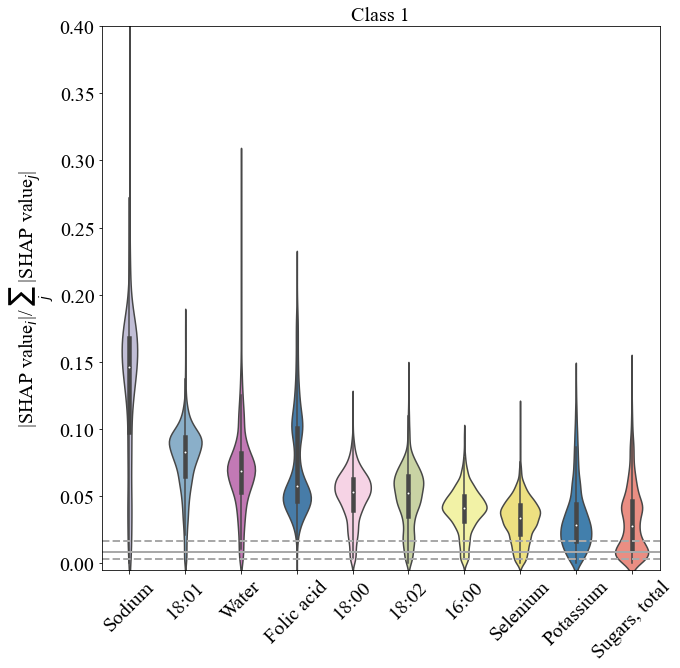

In [21]:
class2check=0
fig, ax = plt.subplots(figsize=(10, 10))
topK=10
topK_loc=np.argsort(-median_norm_shap_dict[class2check])[:topK]
df=pd.DataFrame(data=norm_shap_dict[class2check], columns=selnut).iloc[:,topK_loc]
df_unpack=pd.DataFrame({'Nutrient': [c for c in df.columns for v in range(df.shape[0])],
                        'Relevance': [v for c in df.columns for v in df[c]]})

p=sns.violinplot(data=df_unpack, x="Nutrient", y="Relevance", palette=dictcolor)
ax.axhline(Q2, color='darkgray', linewidth=2)
ax.axhline(Q3, color='darkgray', linestyle='dashed', linewidth=2)
ax.axhline(Q1, color='darkgray', linestyle='dashed', linewidth=2)

ax.set_xlabel("")
ax.set_ylabel(r"|SHAP value$_i$|/ $\sum_j$ |SHAP value$_j$|", fontsize=20)
ax.set_title('Class '+str(class2check+1), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylim(-0.005, 0.4);


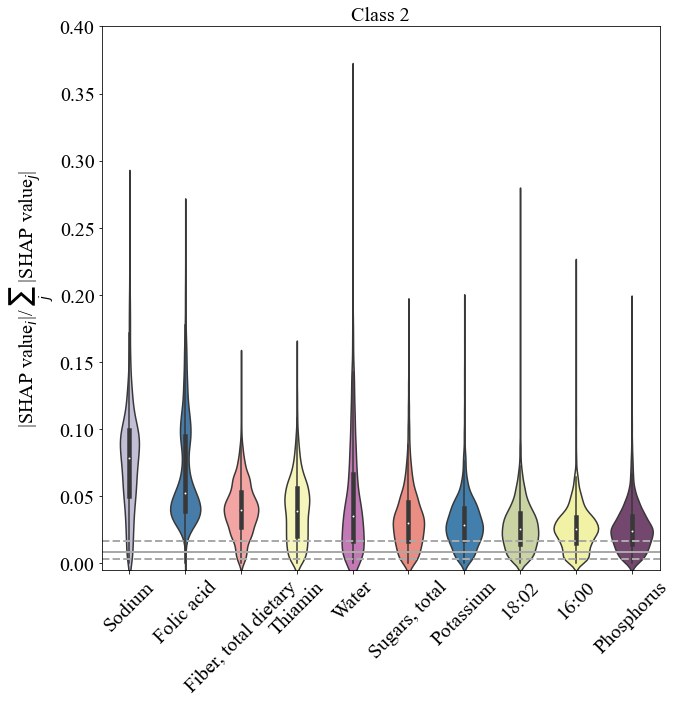

In [22]:
class2check=1
fig, ax = plt.subplots(figsize=(10, 10))
topK=10
topK_loc=np.argsort(-median_norm_shap_dict[class2check])[:topK]
df=pd.DataFrame(data=norm_shap_dict[class2check], columns=selnut).iloc[:,topK_loc]
df_unpack=pd.DataFrame({'Nutrient': [c for c in df.columns for v in range(df.shape[0])],
                        'Relevance': [v for c in df.columns for v in df[c]]})

p=sns.violinplot(data=df_unpack, x="Nutrient", y="Relevance", palette=dictcolor)
ax.axhline(Q2, color='darkgray', linewidth=2)
ax.axhline(Q3, color='darkgray', linestyle='dashed', linewidth=2)
ax.axhline(Q1, color='darkgray', linestyle='dashed', linewidth=2)

ax.set_xlabel("")
ax.set_ylabel(r"|SHAP value$_i$|/ $\sum_j$ |SHAP value$_j$|", fontsize=20)
ax.set_title('Class '+str(class2check+1), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylim(-0.005, 0.4);

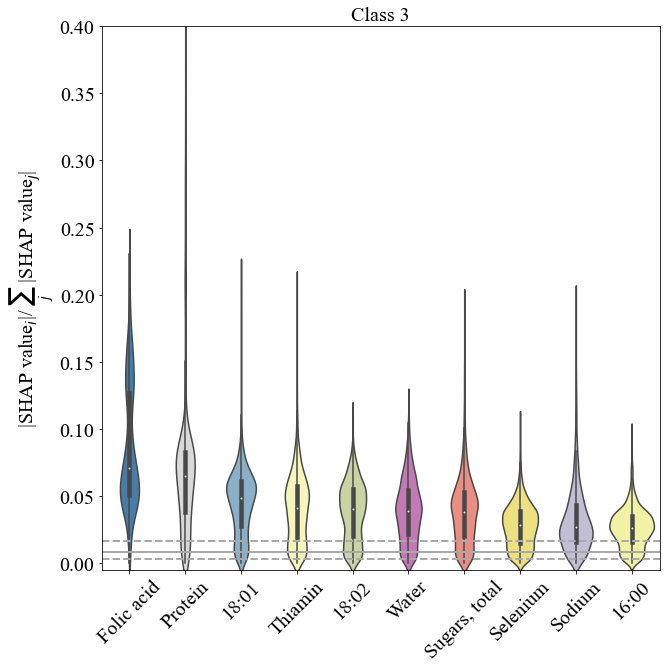

In [23]:
class2check=2
fig, ax = plt.subplots(figsize=(10, 10))
topK=10
topK_loc=np.argsort(-median_norm_shap_dict[class2check])[:topK]
df=pd.DataFrame(data=norm_shap_dict[class2check], columns=selnut).iloc[:,topK_loc]
df_unpack=pd.DataFrame({'Nutrient': [c for c in df.columns for v in range(df.shape[0])],
                        'Relevance': [v for c in df.columns for v in df[c]]})

p=sns.violinplot(data=df_unpack, x="Nutrient", y="Relevance", palette=dictcolor)
ax.axhline(Q2, color='darkgray', linewidth=2)
ax.axhline(Q3, color='darkgray', linestyle='dashed', linewidth=2)
ax.axhline(Q1, color='darkgray', linestyle='dashed', linewidth=2)

ax.set_xlabel("")
ax.set_ylabel(r"|SHAP value$_i$|/ $\sum_j$ |SHAP value$_j$|", fontsize=20)
ax.set_title('Class '+str(class2check+1), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylim(-0.005, 0.4);

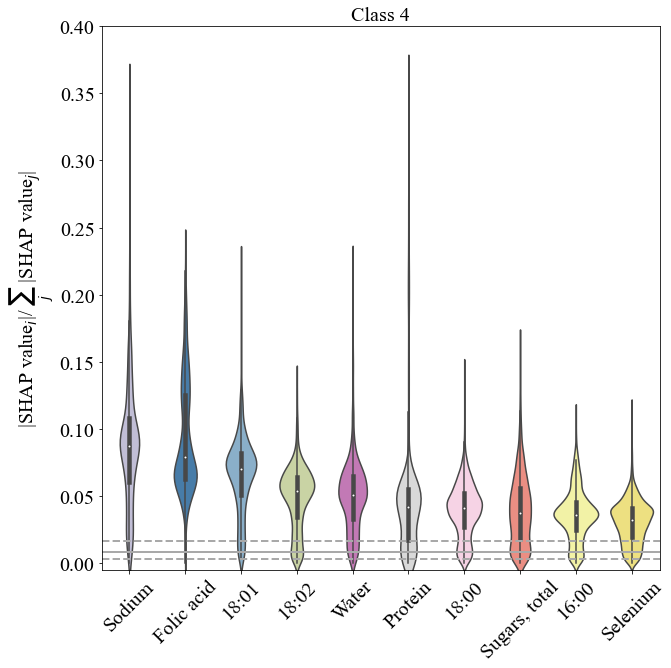

In [24]:
class2check=3
fig, ax = plt.subplots(figsize=(10, 10))
topK=10
topK_loc=np.argsort(-median_norm_shap_dict[class2check])[:topK]
df=pd.DataFrame(data=norm_shap_dict[class2check], columns=selnut).iloc[:,topK_loc]
df_unpack=pd.DataFrame({'Nutrient': [c for c in df.columns for v in range(df.shape[0])],
                        'Relevance': [v for c in df.columns for v in df[c]]})

p=sns.violinplot(data=df_unpack, x="Nutrient", y="Relevance", palette=dictcolor)
ax.axhline(Q2, color='darkgray', linewidth=2)
ax.axhline(Q3, color='darkgray', linestyle='dashed', linewidth=2)
ax.axhline(Q1, color='darkgray', linestyle='dashed', linewidth=2)

ax.set_xlabel("")
ax.set_ylabel(r"|SHAP value$_i$|/ $\sum_j$ |SHAP value$_j$|", fontsize=20)
ax.set_title('Class '+str(class2check+1), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylim(-0.005, 0.4);

# Pictures: Standard Shap

In [25]:
shap_valuesTensor=np.zeros((shap_valuesAll[0].shape[0], shap_valuesAll[0].shape[1], len(shap_valuesAll)))
for ind in range(len(shap_valuesAll)):
    shap_valuesTensor[:,:,ind]=shap_valuesAll[ind]
    
shap_summary_object=shap._explanation.Explanation(values=shap_valuesTensor, base_values=baseAll, data=dataAll, 
                             feature_names=list_shap_values[0].feature_names)

shap_class_dict={ind: shap._explanation.Explanation(values=shap_valuesTensor[:,:,ind], base_values=baseAll[:,ind], data=dataAll, 
                             feature_names=list_shap_values[0].feature_names) for ind in range(shap_valuesTensor.shape[2])}


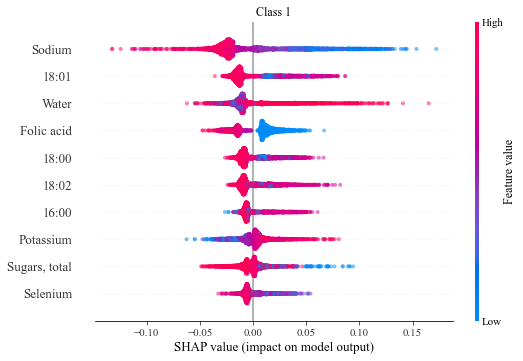

In [26]:
class2check=0
topK=10
topK_loc=np.argsort(-abs(shap_class_dict[class2check].values).mean(axis=0))[:topK]
shap.plots.beeswarm(shap_class_dict[class2check][:,topK_loc],alpha=0.5, show=False)
plt.title('Class '+str(class2check+1)); 

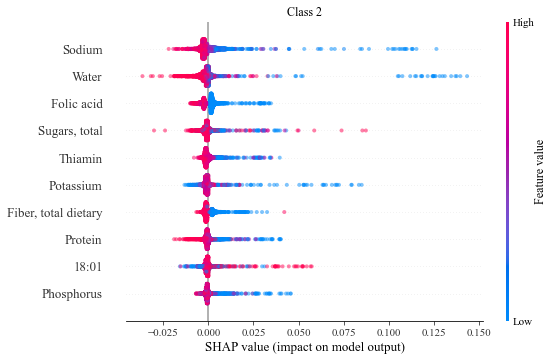

In [27]:
class2check=1
topK=10
topK_loc=np.argsort(-abs(shap_class_dict[class2check].values).mean(axis=0))[:topK]
shap.plots.beeswarm(shap_class_dict[class2check][:,topK_loc],alpha=0.5, show=False)
plt.title('Class '+str(class2check+1)); 

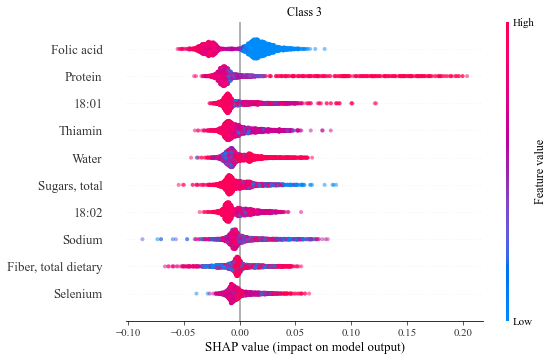

In [28]:
class2check=2
topK=10
topK_loc=np.argsort(-abs(shap_class_dict[class2check].values).mean(axis=0))[:topK]
shap.plots.beeswarm(shap_class_dict[class2check][:,topK_loc],alpha=0.5, show=False)
plt.title('Class '+str(class2check+1)); 

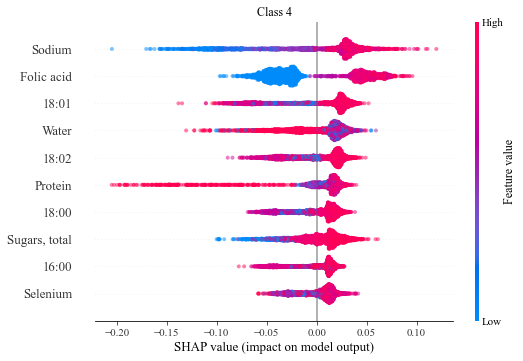

In [29]:
class2check=3
topK=10
topK_loc=np.argsort(-abs(shap_class_dict[class2check].values).mean(axis=0))[:topK]
shap.plots.beeswarm(shap_class_dict[class2check][:,topK_loc],alpha=0.5, show=False)
plt.title('Class '+str(class2check+1)); 